# Improving the visuals of our plots

We already spent some time discussing Tufte's desing principles: the lie factor, the data-ink ratio, and avoiding chart junk. Now it's time to apply them!

Let's start by doing the usual routine: loading the modules we are going to use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

For this exercise we are going to visualize the number of women and men enrolled in Chilean political parties.

In [2]:
path = 'https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)
df.head()

,Partido,Mujeres,Hombres
0,CIUDADANOS,10712,8612
1,COMUNISTA DE CHILE,39748,44754
2,CONVERGENCIA SOCIAL,2076,1981
3,DEMOCRATA CRISTIANO,51803,55809
4,ECOLOGISTA VERDE,8771,7641


Our intention is to show the percentages of female and male members in each political party in a way that allows the user to easily compare them. Since this data is not included, we need to do a bit a preprocessing and calculate the actual percentages. Additionally, we are going to chose a covenient index to use later when we plot the values.

In [3]:
df['Partido'] = df['Partido'].str.title()
df['Total'] = df['Mujeres'] + df['Hombres']
df['Women (%)'] = df['Mujeres'] / df['Total'] * 100
df['Men (%)'] = df['Hombres'] / df['Total'] * 100
df.set_index('Partido', inplace=True)
df.head()

,Mujeres,Hombres,Total,Women (%),Men (%)
Partido,,,,,
Ciudadanos,10712,8612,19324,55.433658,44.566342
Comunista De Chile,39748,44754,84502,47.037940,52.962060
Convergencia Social,2076,1981,4057,51.170816,48.829184
Democrata Cristiano,51803,55809,107612,48.138683,51.861317
Ecologista Verde,8771,7641,16412,53.442603,46.557397


# Let's start from the basics

We will go ahead and create a horizontal bar chart for the percentages.

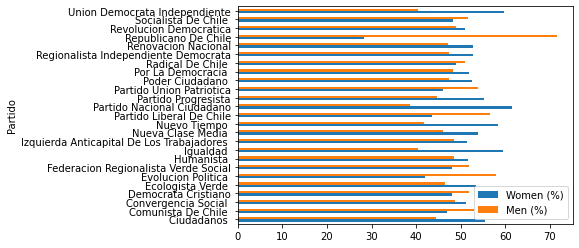

In [4]:
percents = ['Women (%)', 'Men (%)']
df[percents].plot.barh()

### Exercise

Maybe this is not what we had in mind. Think about what this plot communicates.  What insights can you get from it? How can we improve this plot? What should we get rid of? What should we add? Sketch what you envision for this plot and we'll compare it to the final result later.

What I had in mind when I thought about this dataset was a fix width of 100 which would allow me to clearly see the percentage of women and men. For that, I think a stacked bar chart would work better.

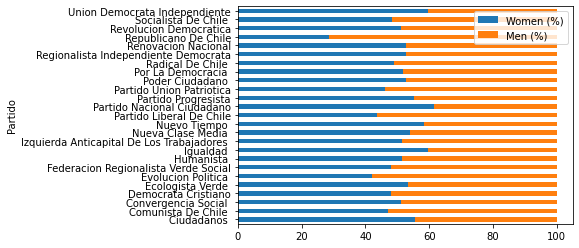

In [5]:
df[percents].plot.barh(stacked=True)

We already have all the information we need in this plot, but it's lacking something. It doesn't look great, it's not very clear, for example, what is the third political party with more women, and so on. We are going to solve these problems step by step.

# Simplify and beautify

Regarding the look of the plot, there are a few things that are bothering me: the width of the bars, the white space on the right, and the legend. Fixing them is part of our process of simplification and beautification: getting rid of elements that don't add any additional information and making our plot more visually pleasing.

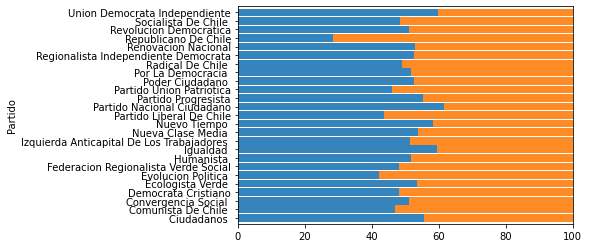

In [6]:
df[percents].plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))

Once those elements weren't bothering me anymore, I started asking myself questions about how well the visualizaiton was working. I realized that it wasn't easy to see what political party had the highest and the lowest percentage of women among their members. Wouldn't it be better to sort them?

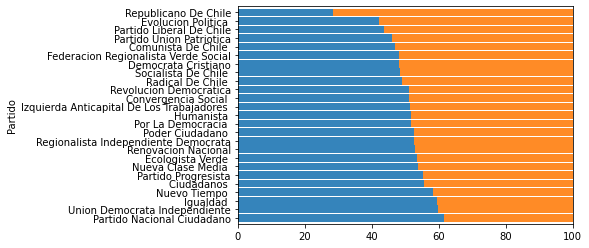

In [7]:
df_sorted = df[percents].sort_values(by = percents[0], ascending = False) 
df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))

Yes, it is much better. Now, we should continue simplifying and beautifying our plots. Matplotlib includes a black border by default, which, in this case, doesn't add much to the plot: it doesn't provide extra information and it doesn't help making what is already plotted clearer. Removing it would maximize the data-ink ratio of our visualization. 

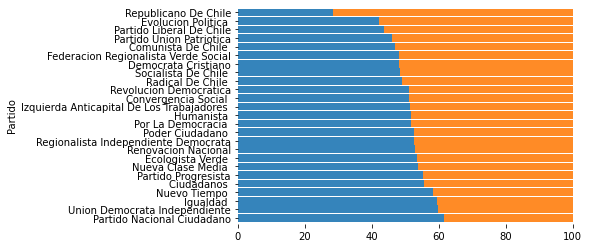

In [8]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)

We can follow a similar reasoning and remove the ticks from both axes.

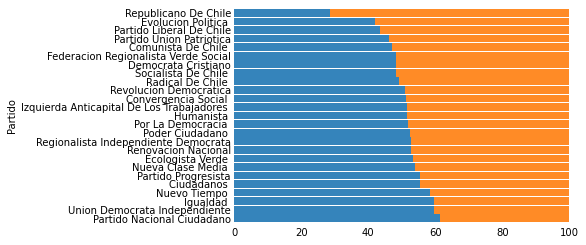

In [9]:
ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)

We still need to get rid of the label on the y-axis and add a title. Remember that the title should be descriptive, and be used to directly communicate your results.

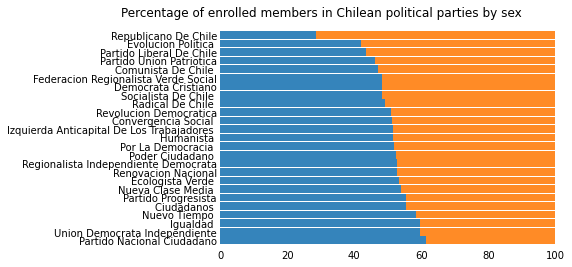

In [10]:
ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Percentage of enrolled members in Chilean political parties by sex")
ax.title.set_position([.3, 1.03])
ax.tick_params(axis=u'both', which=u'both',length=0)

Next step is to bring back the legend to identify what bars correspond to women and men. Instead of using the default legend, we can add the name of the columns we are using on top of the bars.

Text(90, 24.7, 'Men (%)')

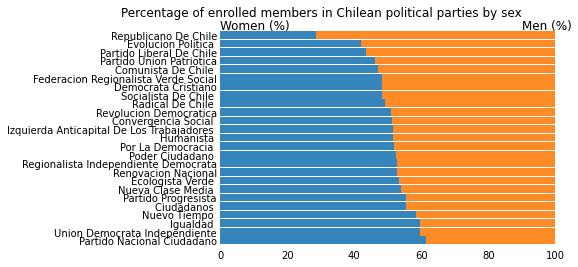

In [11]:
fontsize = 12

ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Percentage of enrolled members in Chilean political parties by sex")
ax.title.set_position([.3, 1.03])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=fontsize)
ax.text(90, df_sorted.shape[0]-0.3, percents[1], fontsize=fontsize)

After adding the labels I realized that matplotlib was using blue for women and orange for men. Here we need to stop to discuss the meaning that we give to some colors. In the same way that cold/hot is associated with red/blue, or that we associate Republicans with red and Democrats with blue, women/men has been associated with pink/blue for a long time. Some colors have implicit meanings in society (e.g. red - passion, green- nature), although some of them might vary on different cultures. The important point is that _we can make concious decisions to follow or break those conventions_. In the case of gender, [this blog post](https://blog.datawrapper.de/gendercolor/) goes in depth to discusss the use of color to represent women and men. 

Coming back to our example, I decided to use orange for women and blue for men, which means that I need to invert the colors with respect to the order in which they are being used now. For that, we need to specify the colors once we call the plot method for the dataframe. In addition, I will follow th Gestalt principle of similarity and use the same colors for the bars and the legend, which will help guiding the eye and making it easier to read for the user.

Text(90, 24.7, 'Men (%)')

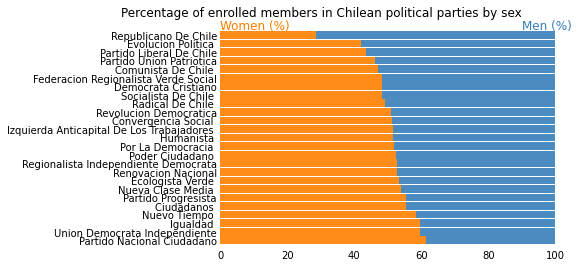

In [12]:
colors = ['#ff7f00', '#377eb8']

ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                         color=colors)
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Percentage of enrolled members in Chilean political parties by sex")
ax.title.set_position([.3, 1.03])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(90, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

One thing that this plot is not accomplishing is letting the user find the exact number for the percentages. The labels on the x-axis help, but they are not precise enough. Instead, we are going to get rid of them and add the values in each one of the bars. For that we will need to define the position of each label manually.

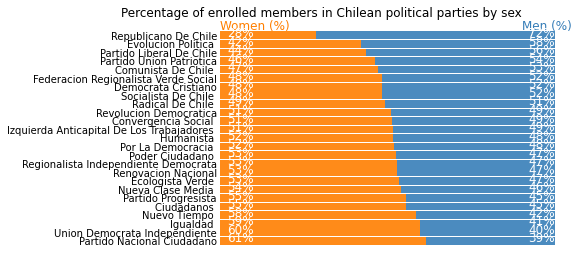

In [13]:
ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                         color=colors)
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Percentage of enrolled members in Chilean political parties by sex")
ax.title.set_position([.3, 1.03])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(90, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

ax.xaxis.set_ticks([])

# ax.patches represent all the bars. The orange ones have p.xy[0] == 0.
for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 92
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1]+0.3), color='white', fontsize=fontsize)

Everything is looking great, but it feels packed. So, as a last step, we want to make our figure bigger, to give it some room to breath.

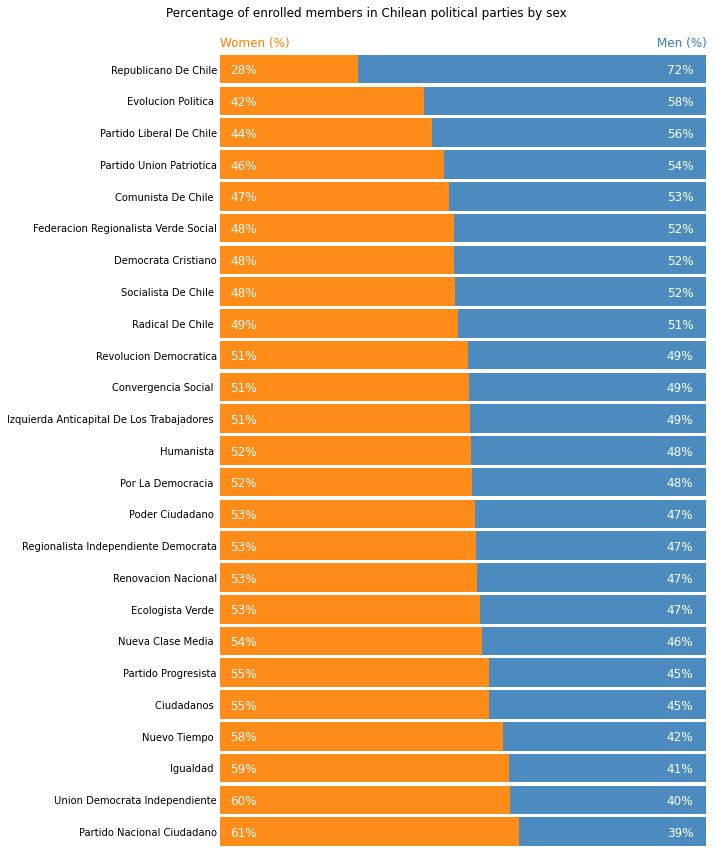

In [14]:
ax = df_sorted.plot.barh(stacked=True, legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                         color=colors, figsize=(10,12))
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Percentage of enrolled members in Chilean political parties by sex")
ax.title.set_position([.3, 1.03])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(90, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

ax.xaxis.set_ticks([])
for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 92
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1]+0.3), color='white', fontsize=fontsize)
    
plt.tight_layout()

### Exercise

This is definitely not a final version. How do you think the plot has improved so far? What else would you change? What would be your intention behind those changes? How would those changes help the user understanding the data?

# Final comments

Since we are used to the default parameters, we tend to forget that by simply deleting and moving some things we can highly improve the readability of our plots. We can do this process step by step, testing and analyzing our plots every time we change some elements. We will eventually converge to a graph that communicates effectively. It's a bit more effort, but it pays off.

### Exercise

You can now go back to the previous tutorial and simplify and beautify the heatmap. A starting point might be removing ticks and adding more labels.

Additionaly, you can revisit some of the plots you have previously done and start thinking about elements that can be removed, moved, or added. How would you improve its readability? How can you make the visual communication more effective?